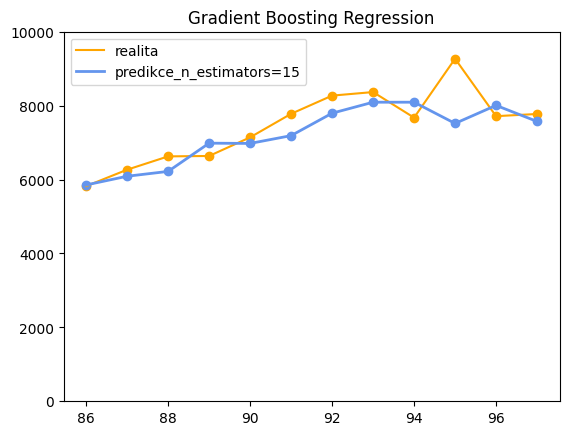

R2: 0.7682645166385741
Root Mean Squared Error: 602.7373935616222
CPU times: total: 406 ms
Wall time: 975 ms


In [2]:
%%time

from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])

df_train =df.drop(df.index[-12:])
df_test = df.drop(df.index[:-12])
df_test_graf = df_test

#@ parametry
parametry = ['aktivni-1', "nove-1", "zbytek-1"]
#>> dataframy
X = df[parametry]
y = df['aktivni']
X_train = df_train[parametry]
y_train =  df_train["aktivni"]
X_test = df_test[parametry]
y_test = df_test['aktivni']
#>>PCA
#TODO zkusit implementovat PCA dokumentace na sk learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#//parametry = ['aktivni-1', 'nove-1','zbytek-1']
#//pca = PCA(n_components=2)
#//pca.fit(df[parametry])
#//keep = pca.get_feature_names_out(df[parametry])
#//print(keep)
#//pca_X = pca.fit_transform(X)
#//display(X)
#//display(pca_X)
#>> trenink
n_estimators = 15
gbr = GradientBoostingRegressor(n_estimators=n_estimators, loss='absolute_error')
gbr.fit(X_train, y_train)

#>> evaluace
y_pred = gbr.predict(X_test)

#>> dotrenovani modelu na vsech datech
gbr.fit(X,y)

#>> graf
plt.figure()
plt.scatter(X_test.index, y_test,c="orange")
plt.plot(X_test.index, y_test,c="orange", label="realita")
plt.scatter(X_test.index, y_pred, color="cornflowerblue")
plt.plot(X_test.index, y_pred, color="cornflowerblue", label=f"predikce_n_estimators={n_estimators}", linewidth=2)
plt.title("Gradient Boosting Regression")
plt.legend()
plt.ylim(0,10000)
plt.show()
#>>metriky
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = np.sqrt(metrics.r2_score(y_test, y_pred))
print("R2:", r2)
print("Root Mean Squared Error:", rmse)

    aktivni-1  nove-1  zbytek-1
98     7773.0  1788.0    6607.0


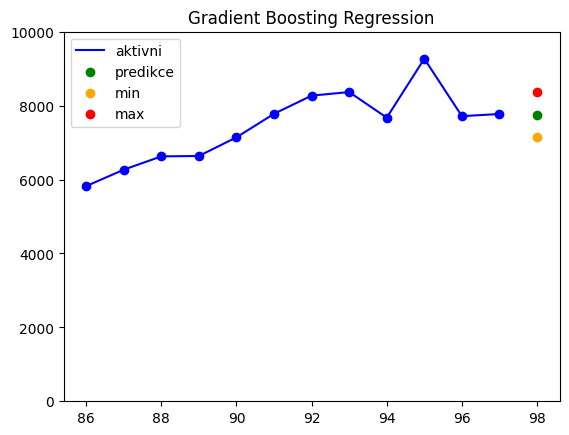


Model:      GradientBoostingRegressor(loss='absolute_error', n_estimators=15)
Min:        7152
Predikce:   7754
Max:        8357
Rmse:       602



In [3]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df_orig = df.drop(df.index[-12:])

df_new = df.drop(df.index[:-1])
print(df_new[parametry])
df_train = df.drop(df.index[-12:])

x_new = df_new[parametry]
#>> predikce
y_new_pred = gbr.predict(x_new)
#>> graf
plt.figure()
plt.title("Gradient Boosting Regression")
#* realita
plt.plot(X_test.index, df_test['aktivni'],label="aktivni",color="blue")
plt.scatter(X_test.index, df_test['aktivni'],color="blue")
#* predikce
plt.scatter(x_new.index, y_new_pred, label='predikce', color="green")
plt.scatter(x_new.index, y_new_pred - rmse, label="min", color="orange")
plt.scatter(x_new.index, y_new_pred + rmse, label="max", color="red")
plt.legend()
plt.ylim(0,10000)
plt.show()
#>> print
print(f"""
Model:      {gbr}
Min:        {int(y_new_pred-rmse)}
Predikce:   {int(y_new_pred)}
Max:        {int(y_new_pred+rmse)}
Rmse:       {int(rmse)}
""")

C:\Users\halik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
C:\Users\halik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_quantile.py:295: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance opti

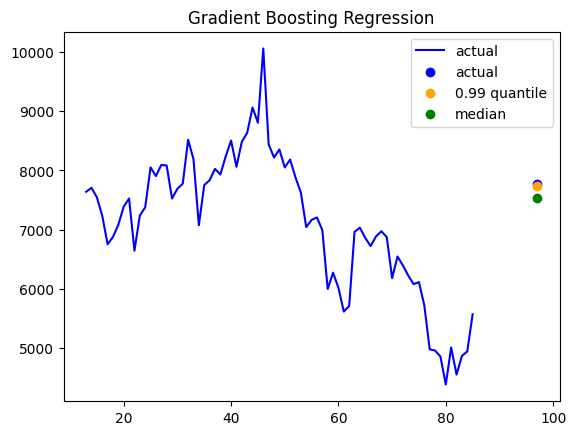


Model:      GradientBoostingRegressor()
Quantiles:  0.99
Range:      100
Prob range: 100.00%



In [17]:
#TODO zprovoznit tak abych byl schopen rict ze na 90% jiste ta hodnota bude v rozmezi x az y...
#TODO nastudovat, pouzit baeyiske metody
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import QuantileRegressor

# load data
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])

df_orig = df.drop(df.index[-12:])
df_new = df.drop(df.index[:-1])
df_train = df.drop(df.index[-12:])

X_train = df_train[parametry]
y_train =  df_train["aktivni"]
X_test = df_test[parametry]
y_test = df_test['aktivni']
# fit gradient boosting regression model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

#@ paramettry
quantile = 0.99
range_value = 100 # replace with your desired range

# predict quatnile
quant_model = QuantileRegressor(alpha=quantile)
quant_model.fit(X_train, y_train)
y_new_pred = quant_model.predict(df_new[parametry])

# calculate range
# compute probabilities of actual demand falling within range
proba_range = ((df_new["aktivni"] >= y_new_pred[0]-range_value) & (df_new["aktivni"] <= y_new_pred[0]+range_value)).mean()

# plot results
plt.figure()
plt.title("Gradient Boosting Regression")
plt.plot(df_orig.index, df_orig["aktivni"], label="actual", color="blue")
plt.scatter(df_new.index, df_new["aktivni"], label="actual", color="blue")
plt.scatter(df_new.index, y_new_pred[0], label=f"{quantile} quantile", color="orange")
plt.scatter(df_new.index, gbr.predict(df_new[parametry]), label="median", color="green")
plt.legend()
plt.show()

# print results
print(f"""
Model:      {gbr}
Quantiles:  {quantile}
Range:      {range_value}
Prob range: {proba_range:.2%}
""")